In [7]:
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa
import librosa.display
import soundfile as sf

from scipy.io.wavfile import read 

from IPython.display import Audio

In [3]:
SEED = 2017
DATA_DIR = 'Data/shababdata/' 

In [4]:
#files = glob.glob(DATA_DIR + "*.wav")

In [5]:
def stereoToMono(audiodata):
    audiodata = audiodata.astype(float)
    newaudiodata = []
    d = audiodata.sum(axis=1) / 2
    newaudiodata.append(d)
    return np.array(newaudiodata, dtype='float32')

for direc in os.listdir(DATA_DIR):
    label = direc
    direc = DATA_DIR + direc + '/'
    for i in os.listdir(direc):
        print(i)
        wav,sr = librosa.load(direc+i, mono=True)
        plt.figure(figsize=(12, 4))
        librosa.display.waveplot(wav.astype('float'), sr=sr)
        plt.show()
        
        X = librosa.stft(wav.astype('float'))
        Xdb = librosa.amplitude_to_db(X)
        plt.figure(figsize=(12, 5))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
        plt.show()
        
        sf.write('./Data/newData/'+label+'_'+i, wav, sr, 'PCM_24')

In [6]:
for direc in os.listdir(DATA_DIR):
    label = direc
    direc = DATA_DIR + direc + '/'
    for i in os.listdir(direc):
        print(i)
        wav,sr = librosa.load(direc+i, mono=True)
        
        sf.write('./Data/newData/'+label+'_000'+'_'+i, wav, sr, 'PCM_24')

        
        #op1: Change Speed and Pitch
        y_pitch_speed = wav.copy()
        # you can change low and high here
        length_change = np.random.uniform(low=0.8, high = 1)
        speed_fac = 1.0  / length_change
        print("resample length_change = ",length_change)
        tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
        minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
        y_pitch_speed *= 0
        y_pitch_speed[0:minlen] = tmp[0:minlen]
        Audio(y_pitch_speed, rate=sr)
        
        sf.write('./Data/newData/'+label+'_100'+'_'+i , y_pitch_speed, sr, 'PCM_24')
        
        #op2 : value augmentation
        y_aug = wav.copy()
        dyn_change = np.random.uniform(low=1.5,high=3)
        print("dyn_change = ",dyn_change)
        y_aug = y_aug * dyn_change
        print(y_aug[:50])
        print(wav[:50])
        sf.write('./Data/newData/'+label+'_200'+'_'+i, y_aug, sr, 'PCM_24')
        
        
        #op3: add distribution noise
        y_noise = wav.copy()
        # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
        noise_amp = 0.005*np.random.uniform()*np.amax(y_noise)
        y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
        sf.write('./Data/newData/'+label+'_300'+'_'+i , y_noise, sr, 'PCM_24')
        
        
        #op4: apply hpss
        y_hpss = librosa.effects.hpss(wav.astype('float64'))
        print(y_hpss[1][:10])
        print(wav[:10])
        sf.write('./Data/newData/'+label+'_400'+'_'+i, y_hpss[0], sr, 'PCM_24')
        
        #op5: Streching
        input_length = len(wav)
        streching = wav.copy()
        streching = librosa.effects.time_stretch(streching.astype('float'), 1.1)
        if len(streching) > input_length:
            streching = streching[:input_length]
        else:
            streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")
        sf.write('./Data/newData/'+label+'_500'+'_'+i , streching, sr, 'PCM_24')
        

0_0.wav
resample length_change =  0.9290432227156514
dyn_change =  2.2215773752858228
[-0.00287881 -0.00463958 -0.00530927 -0.00557125 -0.00597452 -0.00486341
 -0.00478184 -0.0055604  -0.00535319 -0.00476674 -0.00432701 -0.00617679
 -0.00559523 -0.00505562 -0.00578571 -0.00576031 -0.00555626 -0.00644045
 -0.00660327 -0.00698841 -0.00646807 -0.00617678 -0.00608613 -0.00655718
 -0.00767814 -0.0062757  -0.00630556 -0.0067732  -0.00722572 -0.00530338
 -0.00501304 -0.00659002 -0.00644244 -0.00614739 -0.00636443 -0.00680234
 -0.00574522 -0.00663185 -0.00683463 -0.00691737 -0.00657388 -0.00553597
 -0.00682415 -0.00705117 -0.00682407 -0.00672622 -0.00682591 -0.00683317
 -0.00724328 -0.00767959]
[-0.00129584 -0.00208842 -0.00238986 -0.00250779 -0.00268931 -0.00218917
 -0.00215245 -0.00250291 -0.00240964 -0.00214565 -0.00194772 -0.00278036
 -0.00251858 -0.00227569 -0.00260432 -0.00259289 -0.00250104 -0.00289904
 -0.00297233 -0.0031457  -0.00291148 -0.00278036 -0.00273955 -0.00295159
 -0.00345616

[-0.00042719 -0.00054504 -0.00026532 -0.00056457 -0.0004816  -0.00057508
 -0.00043795 -0.00035075 -0.00027864 -0.00041938]
[-0.00101648 -0.00103482 -0.00048404 -0.00119161 -0.00116363 -0.00131083
 -0.00086988 -0.00042003 -0.0005     -0.00099575]
5_0.wav
resample length_change =  0.9391020112329965
dyn_change =  2.2826114926728605
[-0.00816578 -0.0141221  -0.01114745 -0.00935302 -0.01012249 -0.01018741
 -0.00697039 -0.00603737  0.00052253  0.00760703  0.01117585  0.00946618
  0.00909958  0.00469557  0.00060434  0.00425593  0.00369742  0.00056708
 -0.0050044  -0.00661739 -0.00666856 -0.00574703 -0.00147519 -0.00130665
 -0.00235223 -0.00173961 -0.00196214 -0.00086989  0.00106014  0.00228703
 -0.00143727 -0.00680346 -0.01039743 -0.01423214 -0.01143857 -0.00860109
 -0.00622261 -0.00569531 -0.00766869 -0.00559269 -0.00412113  0.00245489
  0.00759264  0.00742829  0.00512202 -0.00168515 -0.00568759 -0.00745374
 -0.00752636 -0.00379796]
[-0.00357738 -0.00618682 -0.00488364 -0.00409751 -0.004434

[-0.00034419 -0.00043609 -0.00032444 -0.00044814 -0.00035756 -0.00042109
 -0.00035902 -0.00045096 -0.00035032 -0.00044554]
[-0.00148815 -0.00172685 -0.00094014 -0.00148435 -0.00200668 -0.00189943
 -0.00218423 -0.002624   -0.00238586 -0.00255679]
0_2.wav
resample length_change =  0.8790786556663117
dyn_change =  1.598911218726019
[-1.2908872e-03  3.3202232e-06  2.0752642e-03  5.1670596e-03
 -3.1240769e-03 -5.6559877e-03  2.3893886e-03  7.5233367e-04
 -1.4364850e-03  2.8759759e-04 -8.4268698e-04  2.0440063e-03
  5.7151304e-03  1.3449404e-03 -9.2588557e-04 -2.6537208e-03
 -1.0152438e-03  1.1157260e-03 -3.1647435e-03 -2.1435772e-03
 -1.4071302e-03 -1.2189989e-03  4.2580334e-03  1.7115751e-03
 -3.2416759e-03  7.0515141e-04  4.5815124e-03  1.7147232e-03
 -1.7227295e-03 -2.4958898e-03  2.5008386e-03  5.7013365e-03
  2.4292439e-03 -3.7192439e-03 -2.5747877e-03  5.8247750e-03
  4.4050263e-03 -3.4893688e-03 -3.3307129e-03  2.2936646e-04
  1.1408612e-03  1.1491341e-03  3.6443290e-04  7.2476520e-0

[0.00425761 0.00452533 0.00502727 0.00585194 0.00639978 0.00680575
 0.00619458 0.00505633 0.0042213  0.00368823]
[0.00046176 0.00084546 0.0013303  0.00207248 0.0022928  0.00291342
 0.00279205 0.0028611  0.00340319 0.00369117]
5_2.wav
resample length_change =  0.8058619639187349
dyn_change =  2.1066779770501007
[ 3.83399252e-04  4.68216313e-04  3.65717162e-04  4.19459568e-04
  4.46534745e-04 -4.24929531e-05 -1.77748167e-04  1.78150091e-04
  4.28763364e-04  4.70003404e-04 -3.67320754e-05  2.98080093e-04
  5.29381388e-04  2.33338051e-05 -7.05723243e-04 -8.34440871e-04
 -7.89815560e-04 -7.80927483e-04 -1.13769423e-03 -1.46222278e-03
 -1.40216132e-03 -2.02255254e-03 -1.62499107e-03 -1.52680394e-03
 -1.47669378e-03 -1.53384521e-03 -1.55739416e-03 -1.00494921e-03
 -1.18031807e-03 -1.45808142e-03 -1.52183021e-03 -1.12185231e-03
 -3.71025089e-04 -1.45137465e-05 -4.76278685e-04 -7.18729716e-05
  3.35084005e-05 -2.39461806e-04 -5.49629214e-04 -6.60558639e-04
 -8.42541849e-05 -1.19883618e-04 -4.59

[-4.15806296e-04  1.39531610e-03  4.58414822e-03  2.49372466e-03
 -3.34344387e-05  9.84769942e-04  3.67655249e-03  3.43622488e-03
 -7.45935791e-04  1.08167340e-03]
[-9.5061543e-05  4.1953379e-05  4.3544598e-04 -8.0352160e-04
  4.1790382e-04 -4.4992010e-04 -4.0747464e-04  4.9171189e-04
 -9.2186115e-04  2.5455875e-04]
10_3.wav
resample length_change =  0.9894685672563697
dyn_change =  2.5005863622495808
[-0.00196825 -0.00430483 -0.00348109 -0.00242105  0.00281387  0.00326342
  0.00321002  0.00252532  0.00063945 -0.00081308 -0.0015729  -0.0031724
 -0.00472075 -0.00530193 -0.00665203 -0.00644997 -0.00866119 -0.00830087
 -0.00862263 -0.00452315 -0.00338096 -0.00291979 -0.00298493 -0.00690543
 -0.00502347 -0.00612542 -0.0065201  -0.00861936 -0.00782136 -0.00717317
 -0.01012282 -0.01015472 -0.01043389 -0.01168708 -0.01233445 -0.01359042
 -0.01233274 -0.00945529 -0.01290728 -0.01158471 -0.01014423 -0.01056784
 -0.00904175 -0.00979677 -0.01187399 -0.01566266 -0.01694911 -0.01494104
 -0.0121717 

[-0.00617179 -0.00614549 -0.00600451 -0.00707378 -0.00816499 -0.00910162
 -0.00907371 -0.00855977 -0.00828047 -0.00798037]
[-1.1362816e-03 -4.6137784e-04  3.3328959e-04  4.9507289e-05
  9.1573759e-04  1.5553668e-03  2.6369318e-03  3.7720667e-03
  3.6654579e-03  3.2328488e-03]
5_3.wav
resample length_change =  0.9914890566823132
dyn_change =  2.6459186394075247
[-0.00882357 -0.01383172 -0.00778161 -0.00809474 -0.00735711 -0.00727708
 -0.00499044 -0.00768016 -0.00809746 -0.0096204  -0.00949384 -0.01032749
 -0.01626318 -0.01459292 -0.00984402 -0.00301974  0.00136992  0.00011577
 -0.00256975 -0.00925422 -0.01661951 -0.01701936 -0.02083189 -0.02197363
 -0.02434634 -0.02441583 -0.02221941 -0.01923266 -0.01377937 -0.00866804
 -0.00458721 -0.00372165 -0.00052495 -0.00053104  0.00051791  0.00126831
 -0.00161335 -0.0015611   0.00034365 -0.0047795  -0.01067163 -0.00670349
 -0.00076921  0.00252918  0.00658329  0.00733308  0.00904895  0.01071816
  0.01420466  0.01712252]
[-3.3347851e-03 -5.2275681e

[ 1.68840110e-05 -4.69915023e-04 -7.14956119e-05 -6.17236792e-04
 -2.55097989e-04 -4.98276476e-04  3.95884600e-06 -2.78118474e-04
 -1.39452991e-04 -3.66384863e-04]
[-0.00479874 -0.00705272 -0.00618768 -0.00693481 -0.00614756 -0.00531671
 -0.00215826 -0.00113121  0.00030157  0.00239248]
0_4.wav
resample length_change =  0.8922636098708081
dyn_change =  2.5473849734958804
[-6.6066353e-04 -6.5112434e-04 -6.9827925e-05 -3.3165267e-04
 -6.4686168e-04 -8.1703172e-04 -1.3080459e-03 -1.9776598e-05
  1.9898717e-03  1.9483835e-03 -2.2676731e-04 -7.1540958e-04
  3.4447844e-04 -1.1776367e-03 -2.9973134e-03 -1.2522739e-03
  7.7854103e-04 -4.9728138e-04  1.2357284e-04  1.4994490e-03
  3.3306127e-04 -1.8297500e-03 -1.4174200e-03 -3.6138622e-04
 -1.3078478e-03 -1.5628480e-03 -1.0251453e-03 -7.0916512e-04
 -1.3318815e-03 -5.9754733e-04  7.6171645e-04  3.4056367e-05
 -9.1435947e-04  3.3220128e-04  4.3560396e-04 -1.2246956e-03
 -4.9479667e-04  6.3422363e-04  5.3513609e-04  4.8133891e-04
  4.7576765e-04 -

[-0.0152887  -0.01503497 -0.01541038 -0.01571607 -0.01557062 -0.01412736
 -0.01122712 -0.0060927   0.00167601  0.01064502]
[0.00033463 0.00061964 0.00053766 0.0006884  0.00082269 0.00096963
 0.00106778 0.00123944 0.00152906 0.00165129]
5_4.wav
resample length_change =  0.8062900340851537
dyn_change =  2.1940776735183363
[-8.4920344e-04 -1.2500385e-03 -1.1948977e-03 -1.1214858e-03
 -9.5138821e-04 -1.4997378e-03 -2.2042596e-03 -2.6424057e-03
 -2.4918863e-03 -1.5149761e-03 -8.8146230e-04 -4.2209314e-04
 -5.7242501e-05 -1.6796423e-04 -4.4971771e-04 -1.3588269e-03
 -2.4885754e-03 -2.9422543e-03 -2.0870054e-03 -1.6132569e-03
 -1.1595312e-03  8.0497382e-05  1.1193593e-03  1.0937181e-03
  2.9391295e-04 -7.6198956e-04 -2.0950106e-03 -2.4603042e-03
 -3.1276864e-03 -2.9297608e-03 -1.8865041e-03  3.3998585e-04
  1.8367725e-03  3.6800150e-03  4.1499333e-03 -5.7402940e-04
 -2.8026437e-03 -3.8244976e-03 -3.1173374e-03 -3.5235542e-03
 -4.6330425e-03  1.1904765e-03  7.1327537e-03  5.1967446e-03
  3.601

[0.00660222 0.00562138 0.00387218 0.00332049 0.00448052 0.00552392
 0.00787258 0.01231841 0.0146612  0.00478961]
[-1.5858856e-04 -1.3164078e-03 -2.0868208e-03 -2.0040772e-03
  9.3123694e-05  1.2138452e-03  2.1284840e-03  7.9298029e-03
  1.2908560e-02 -2.7516433e-03]
0_5.wav
resample length_change =  0.8882202275964122
dyn_change =  2.5387722716803793
[ 0.01052611  0.01047509 -0.0131203  -0.00283209  0.00516192  0.00425643
  0.01132595 -0.00327017 -0.01642554 -0.00308413  0.01295664  0.00571899
 -0.01200775 -0.01304276  0.00038506  0.00370178  0.00217302 -0.00986581
 -0.00852102 -0.00073757 -0.00201461 -0.00317796 -0.00181914 -0.005465
 -0.01425132 -0.00115871  0.00464142 -0.00716077 -0.00870415 -0.00260545
 -0.00805572 -0.00071079 -0.00454231 -0.0108695   0.00627463 -0.00286236
 -0.0180985  -0.00078366  0.00049147  0.00038401  0.00472262 -0.01377054
 -0.00814507 -0.00245989  0.00464032  0.00363438 -0.0113754  -0.01161975
 -0.00055102  0.007119  ]
[ 0.00414614  0.00412604 -0.00516797 -0

[ 0.00761597  0.0143941  -0.00111745  0.0059201   0.00946822  0.0020671
  0.0045896   0.00614143 -0.00321459  0.0002979 ]
[ 1.7938906e-02  2.7451970e-02  9.1295112e-03  1.5632018e-02
  2.0846661e-02  9.9014686e-03  1.1398822e-02  1.0863356e-02
 -4.6975409e-05  4.1655237e-03]
6_5.wav
resample length_change =  0.9790337042176596
dyn_change =  2.7136588795963323
[-0.01726551 -0.00156581  0.01497031 -0.01754786 -0.00274179  0.00655357
  0.00101715 -0.00026391 -0.00644408  0.00275914 -0.00109996 -0.01027349
  0.01479353  0.00761691 -0.00948212  0.01620237  0.00490985 -0.00598861
  0.01242734  0.00214503  0.00818676  0.01916776 -0.01281316  0.00488205
  0.03273094 -0.00307578 -0.01068909  0.02139282  0.0168942  -0.01559192
 -0.00973222  0.02007153  0.01643259 -0.01493254 -0.00583812  0.02442977
  0.00189223 -0.00939183  0.01621681  0.007254    0.00542102  0.01669928
 -0.01090998  0.00165102  0.02353053 -0.00562277  0.00428263  0.01971199
  0.00451998  0.00692292]
[-6.3624466e-03 -5.7701045e-

[-0.00025226 -0.00025527 -0.00031926 -0.00013416  0.00013171 -0.00041786
 -0.0003923   0.00021679 -0.00010572 -0.00065158]
[-2.8726939e-04 -1.3428885e-05  4.0808655e-04 -1.4167932e-04
 -1.1433386e-05 -2.5179063e-05 -7.2789378e-04 -7.2946498e-04
 -6.8451121e-04 -1.6810838e-03]
1_6.wav
resample length_change =  0.8140585485407084
dyn_change =  2.527837397377997
[-0.06834844 -0.10835338 -0.1010588  -0.11203557 -0.10774805 -0.11190658
 -0.10644449 -0.10463815 -0.09763035 -0.09305111 -0.08421804 -0.07581459
 -0.06243971 -0.05102135 -0.04116676 -0.02658086 -0.01212256  0.00035791
  0.01440505  0.02963285  0.04145642  0.05507087  0.06582876  0.07475938
  0.08386132  0.09149143  0.09580602  0.1005659   0.10172212  0.0993799
  0.09780002  0.09377437  0.08699347  0.08159296  0.07392319  0.06313222
  0.0540568   0.04349525  0.03029908  0.02015257  0.00984483 -0.00188215
 -0.0108298  -0.01946667 -0.02994129 -0.03931036 -0.04840987 -0.05813631
 -0.06625558 -0.07452652]
[-0.0270383  -0.04286406 -0.0

[ 0.00030314 -0.00023128 -0.00034102 -0.00129054 -0.00079154 -0.00109908
  0.00035297  0.00099423  0.00035495 -0.00038099]
[-3.1357226e-03 -2.4693485e-03 -8.1198831e-04 -2.0389236e-03
 -2.0656348e-03 -3.1192410e-03  5.6519359e-04  4.4894870e-03
  2.5597720e-03  2.8829405e-05]
6_6.wav
resample length_change =  0.9599278792007404
dyn_change =  1.6223192287740564
[ 0.00082714  0.00123868  0.00137659  0.00136131  0.00075162  0.00022937
 -0.00076188 -0.00226956 -0.00374839 -0.00432219 -0.00518769 -0.0058607
 -0.00567938 -0.00596385 -0.00599887 -0.00476279 -0.00464678 -0.00524158
 -0.00443046 -0.00419992 -0.00414186 -0.00413249 -0.00507402 -0.00624502
 -0.00644554 -0.00598204 -0.00633531 -0.00677524 -0.00606986 -0.00586681
 -0.00587332 -0.00512835 -0.0044223  -0.00374138 -0.00310233 -0.00212729
 -0.00184194 -0.00203889 -0.00102101 -0.00067545 -0.00157566 -0.00143579
 -0.00125176 -0.00136411 -0.00099565 -0.00168753 -0.00228592 -0.00220908
 -0.0023411  -0.00195295]
[ 0.00050985  0.00076353  0.

[-3.35102481e-04 -4.33388703e-04 -2.56764787e-04 -2.64680070e-04
 -1.23113376e-04  4.53665533e-05  1.86219298e-04  1.75646179e-04
  3.91570932e-04  4.36442249e-04]
[-7.3380861e-04 -8.8348228e-04 -3.4176113e-04 -3.1324915e-04
 -9.1389753e-05  4.8068736e-04  5.3365034e-04  4.5565449e-04
  9.0645102e-04  9.2548982e-04]
1_7.wav
resample length_change =  0.9068916665916147
dyn_change =  1.7566505722553305
[ 0.00425421  0.00588481  0.00425326  0.00408351  0.00321785  0.0032628
  0.00279042  0.00290056  0.00274557  0.00239698  0.00156492  0.00099165
  0.00043266 -0.0002121  -0.00113275 -0.00179563 -0.00215034 -0.00289917
 -0.00350221 -0.00373357 -0.00366549 -0.00320793 -0.0030917  -0.00373456
 -0.00458063 -0.00576    -0.00606503 -0.00600358 -0.00658381 -0.00761413
 -0.00833748 -0.00919572 -0.01016033 -0.01058648 -0.01106019 -0.01226747
 -0.01274668 -0.01219328 -0.01270216 -0.01286022 -0.0119857  -0.01224874
 -0.01270962 -0.01268891 -0.01301098 -0.01287673 -0.01265341 -0.01262529
 -0.01307334 

[ 4.45185613e-04 -3.35528067e-04  1.20813324e-04 -2.36741534e-04
  1.06140898e-04 -1.93639248e-05  1.23323531e-04 -1.52316132e-05
  1.14142665e-04  1.00079633e-04]
[-0.00223896 -0.00370011 -0.00337595 -0.00362699 -0.00337947 -0.00303248
 -0.00249834 -0.00221807 -0.00158253 -0.00135806]
6_7.wav
resample length_change =  0.8873175107117012
dyn_change =  2.172442183558309
[ 5.0104982e-03  9.3917251e-03  9.0762898e-03  9.2258137e-03
  8.5529899e-03  7.8906128e-03  6.2211426e-03  5.1682424e-03
  4.5363349e-03  5.7401112e-03  6.8781259e-03  6.0663098e-03
  6.7765368e-03  6.8894001e-03  3.4447231e-03  5.4959520e-03
  7.9709589e-03  1.3265044e-03  1.6947301e-03  5.2719163e-03
 -3.9793758e-04  3.3881894e-05  3.5979508e-03  8.3048799e-04
  2.1767295e-03  3.9454796e-03  1.9982653e-03  2.5947490e-03
  1.2526276e-03 -4.4493776e-04  1.2343204e-04 -1.8034539e-03
 -3.4431482e-03 -4.2635538e-03 -4.6418584e-03 -2.3794873e-03
 -2.1713141e-03 -3.7704089e-03 -2.7705983e-03 -2.8058570e-03
 -3.1128661e-03 -2

[0.00787285 0.00694365 0.00604771 0.00492942 0.00391862 0.00422949
 0.00460268 0.00480354 0.00471898 0.004552  ]
[-1.8099823e-06  8.2088860e-07  5.8110243e-07 -2.4428919e-06
  4.7930189e-06 -7.6438791e-06  1.0978516e-05 -1.4754540e-05
  1.8891578e-05 -2.3276287e-05]
1_8.wav
resample length_change =  0.9687955725574877
dyn_change =  2.0872252665688134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[ 2.20782167e-04  4.52105691e-04  4.30365612e-04  3.46954004e-04
  3.22139787e-04  1.35620293e-04 -2.35041836e-06 -2.28934802e-04
 -4.19905575e-04 -6.66438663e-04]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2_8.wav
resample length_change =  0.8317968832469244
dyn_change =  2.1422083858510366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[-0.00617741 -0.00560704 -0.00510884 -0.00525195 -0.00509245 -0.00501676
 -0.00508318 -0.00528738 -0.00519613 -0.00527269]
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -1.3362474e-10  3.9048511e-11
 -6.8945951e-12 -4.8048721e-10]
9_9.wav
resample length_change =  0.8919595451692669
dyn_change =  2.634218513312358
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -3.5199674e-10  1.0286231e-10 -1.8161870e-11
 -1.2657083e-09  3.1271081e-

[0.00835834 0.00790225 0.0082502  0.00823611 0.00799032 0.00775473
 0.00772509 0.00812832 0.00830233 0.00752569]
[-2.61736946e-04 -7.70577288e-04  6.46675153e-06  1.87118072e-04
 -6.88288244e-04 -7.54421286e-04 -5.59499953e-04 -2.99329462e-04
 -1.18854098e-06 -1.02428545e-04]
4_9.wav
resample length_change =  0.9003951320579225
dyn_change =  2.916190828000607
[ 4.3977422e-04  5.4278622e-05  4.9765247e-05  2.1004553e-04
 -1.3265738e-04 -7.9742342e-05 -3.3355065e-04 -1.7769913e-04
 -6.4469976e-05 -5.5177626e-04 -1.0091533e-03 -3.8102173e-04
  1.6522514e-05  6.4054236e-04  1.1824697e-03  1.0919953e-03
  1.6809291e-03  1.9282728e-03  1.0265957e-03  2.3249538e-04
  7.4198528e-05  2.9570043e-05  3.7312842e-05 -1.4810628e-04
 -1.6844370e-04  1.8673312e-04  3.1238754e-04 -7.4371666e-04
 -7.2954496e-04 -4.2725887e-04 -1.2380732e-03  1.3728147e-04
  1.2854850e-03  7.4560521e-04  9.0999022e-04  1.2994102e-03
  1.4646000e-03  2.6871334e-03  3.1790663e-03  2.7131392e-03
  3.7888319e-03  4.6038525e-

9_9.wav
resample length_change =  0.8254666009505491
dyn_change =  2.927212418460882
[-9.4305964e-05 -1.8046456e-04 -1.3681082e-04 -7.4287156e-05
 -2.8458833e-05 -3.1529926e-05 -5.0528095e-05 -1.7770539e-05
  9.2612732e-05  1.9130243e-04  1.6834300e-04 -5.7962834e-06
 -2.3223022e-04 -2.9077556e-04 -1.6423543e-04  1.2969218e-05
  9.5515570e-05 -6.4918779e-05 -2.1757268e-04 -1.8243818e-04
  5.6497433e-06  2.6386694e-04  1.5438569e-04 -1.7346488e-04
 -4.2890024e-04 -2.1673161e-04  2.3667980e-04  3.1415425e-04
  1.9638301e-04 -1.6822625e-04 -2.0691712e-04 -5.8072701e-06
 -1.4853891e-05  6.5931854e-05 -9.5684380e-05 -6.9094844e-05
 -6.0989110e-05 -2.3053509e-04 -5.0326349e-04 -6.5609708e-04
 -6.5107329e-04 -4.1126486e-04 -3.9614219e-04 -6.7564700e-04
 -5.9047143e-04 -5.2207499e-04  1.9801079e-04  1.4282779e-04
 -4.4706478e-04 -1.4834778e-03]
[-3.2216987e-05 -6.1650651e-05 -4.6737579e-05 -2.5378122e-05
 -9.7221618e-06 -1.0771315e-05 -1.7261505e-05 -6.0708062e-06
  3.1638541e-05  6.5353110e-0

[ 4.23979436e-05 -6.51862474e-05  3.98309857e-05 -8.12350671e-05
  3.88099179e-07 -7.55755918e-05  6.40381232e-06 -9.23025156e-05
 -1.67835556e-05 -4.77845334e-05]
[-0.00085418 -0.00142079 -0.00102764 -0.00121807 -0.00118885 -0.00083242
 -0.00092926 -0.00143478 -0.00140954 -0.00116653]
4_1.wav
resample length_change =  0.9440725989174674
dyn_change =  2.58464433670486
[ 0.00427802  0.0067545   0.00631065  0.00597603  0.00475871  0.00454059
  0.00448077  0.0043967   0.00364972  0.00387835  0.00422317  0.00418914
  0.00528829  0.00729342  0.00680587  0.00474964  0.00428333  0.00478169
  0.00393349  0.00443275  0.00603663  0.00577207  0.00406731  0.00253186
  0.0025587   0.00324832  0.00300297  0.0025269   0.00288287  0.00329855
  0.00266339  0.00250969  0.00181457 -0.00035449 -0.00065873 -0.0019203
 -0.00181521 -0.00105859 -0.0003627   0.0011053  -0.00041539 -0.00126614
 -0.00140604 -0.00150784 -0.00251636 -0.00363399 -0.00468473 -0.00410468
 -0.00355302 -0.00334605]
[ 0.00165517  0.0026

9_1.wav
resample length_change =  0.8535475421440551
dyn_change =  2.9020018443398783
[ 3.4032739e-03  5.5000642e-03  5.9623723e-03  7.5998083e-03
  7.4663297e-03  7.3290775e-03  7.7471985e-03  7.0507643e-03
  6.3811708e-03  7.4922596e-03  7.7631092e-03  7.0905830e-03
  6.2388713e-03  6.2990007e-03  5.3946804e-03  3.8531341e-03
  5.7674851e-03  6.0374835e-03  2.8493812e-03  2.2209396e-03
  4.2666099e-03  3.5257936e-03  1.7451614e-03  2.3258505e-03
  3.2169111e-03  3.6954042e-03  2.6478353e-03  1.7240755e-03
  2.0478331e-03  2.5959881e-03  1.0350841e-03  1.5925301e-03
  2.3669484e-03  8.7409263e-04  1.6118444e-03  1.4876209e-03
  1.7146922e-03  2.5884460e-03  2.7622818e-03  1.9912526e-03
  1.3777508e-03  1.9660264e-03  1.8956105e-03  2.4331033e-03
  2.9433442e-03  2.1815412e-03  5.1323563e-04 -2.3748209e-04
  3.0350624e-04 -7.2896677e-05]
[ 1.1727331e-03  1.8952655e-03  2.0545721e-03  2.6188157e-03
  2.5728205e-03  2.5255247e-03  2.6696050e-03  2.4296208e-03
  2.1988859e-03  2.5817556e-

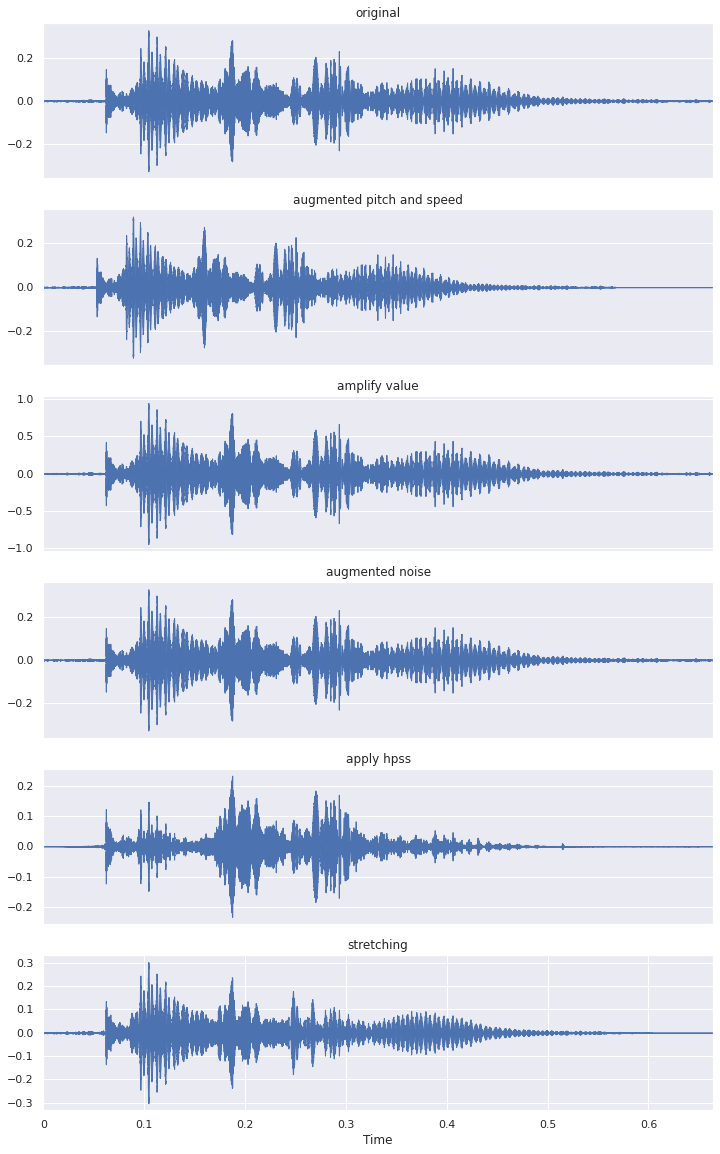

In [11]:
#Plots
plt.figure(figsize=(12, 4*5))
plt.subplot(6, 1, 1)
librosa.display.waveplot(wav.astype('float'), sr=sr,x_axis=None)
plt.title('original')

plt.subplot(6, 1, 2)
librosa.display.waveplot(y_pitch_speed.astype('float'), sr=sr,x_axis=None)
plt.title('augmented pitch and speed')

plt.subplot(6, 1, 3)
librosa.display.waveplot(y_aug.astype('float'), sr=sr,x_axis=None)
plt.title('amplify value')

plt.subplot(6, 1, 4)
librosa.display.waveplot(y_noise, sr=sr,x_axis=None)
plt.title('augmented noise')

plt.subplot(6, 1, 5)
librosa.display.waveplot(y_hpss[1], sr=sr,x_axis=None)
plt.title('apply hpss')

plt.subplot(6, 1, 6)
librosa.display.waveplot(streching, sr=sr)
plt.title('stretching')
plt.show()